# Загрузка Pandas и очистка данных

In [2]:
import pandas as pd
import re
from datetime import datetime

In [3]:
df = pd.read_csv('main_task.csv')

In [4]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [5]:
mean_reviews = int(round(df[['Number of Reviews']].mean(), 0))
df['Number of Reviews'] = df['Number of Reviews'].fillna(mean_reviews)

## Normalizing features

In [6]:
# NaN values are substituted by empty array
df['cuisines'] = df['Cuisine Style'].fillna('[]')

# parses string value into array of string values
def parse_array(array_string):
    if type(array_string) != str:
        return array_string
    array_string = array_string.replace('[', '').replace(']', '').replace('\'', '')
    return array_string.split(', ')

df['cuisines'] = df['cuisines'].apply(parse_array)
df['cuisines']

0                        [European, French, International]
1                                                       []
2        [Japanese, Sushi, Asian, Grill, Vegetarian Fri...
3                                                       []
4          [German, Central European, Vegetarian Friendly]
                               ...                        
39995    [Italian, Vegetarian Friendly, Vegan Options, ...
39996    [French, American, Bar, European, Vegetarian F...
39997                                    [Japanese, Sushi]
39998    [Polish, European, Eastern European, Central E...
39999                                            [Spanish]
Name: cuisines, Length: 40000, dtype: object

In [7]:
# convert string value into number value
def price_range_value(x):
    if type(x)  != str:
        return float('NaN')
    if x == '$$$$':
        return 3
    if x == '$$ - $$$':
        return 2
    if x == '$':
        return 1
    return -1;

price_ranges = df['Price Range'].apply(price_range_value)

## Feature Engineering

### Time period between reviews in days

In [8]:
df['Reviews'][0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [9]:
def last_review_on(reviews_string):
    date_strings = re.findall("'(\d{2}/\d{2}/\d{4})'", reviews_string)
    dates = [datetime.strptime(date_string, '%m/%d/%Y') for date_string in date_strings]
    return max(dates) if len(dates) > 0 else datetime.strptime('01/01/1970', '%m/%d/%Y')

# parses dates in a string and calculates time period between those in days
def reviews_diff_days(reviews_string):
    date_strings = re.findall("'(\d{2}/\d{2}/\d{4})'", reviews_string)
    dates = [datetime.strptime(date_string, '%m/%d/%Y') for date_string in date_strings]
    if len(dates) == 2:
        delta = dates[1] - dates[0]
        return abs(delta.days)
    return float('NaN')

# new feature - time period between reviews in days
reviews_in_days = df['Reviews'].apply(reviews_diff_days)
reviews_in_days

0          41.0
1         382.0
2           2.0
3           NaN
4         272.0
          ...  
39995      34.0
39996       9.0
39997    3127.0
39998      23.0
39999    1306.0
Name: Reviews, Length: 40000, dtype: float64

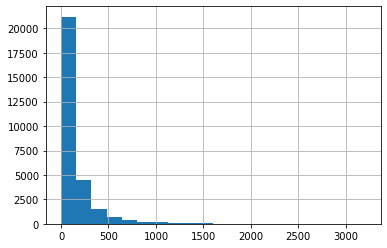

In [10]:
reviews_in_days.hist(bins=20)

### Country

In [11]:
df['City'].unique()

countries_by_city = {'Paris': 'France', 
                     'Stockholm': 'Sweden',
                     'London': 'Britain',
                     'Berlin': 'Germany',
                     'Munich': 'Germany',
                     'Oporto': 'Portugal',
                     'Milan': 'Italy',
                     'Bratislava': 'Slovakia',
                     'Vienna': 'Austria',
                     'Rome': 'Italy',
                     'Barcelona': 'Spain',
                     'Madrid': 'Spain',
                     'Dublin': 'Ireland',
                     'Brussels': 'Belgium',
                     'Zurich': 'Switzerland',
                     'Warsaw': 'Poland',
                     'Budapest': 'Hungary',
                     'Copenhagen': 'Denmark',                     
                     'Amsterdam': 'Netherlands',
                     'Lyon': 'France',
                     'Hamburg': 'Germany',
                     'Lisbon': 'Portugal',
                     'Prague': 'Czech Republic',
                     'Oslo': 'Norway',
                     'Helsinki': 'Finland',
                     'Edinburgh': 'Scotland',
                     'Geneva': 'Switzerland',
                     'Ljubljana': 'Slovenia',
                     'Athens': 'Greece',
                     'Luxembourg': 'Luxembourg country',
                     'Krakow': 'Poland'}

def country(city):
    return countries_by_city[city]

f_countries = df['City'].apply(country).rename('Country')

### City population

In [12]:
population_by_city = {'Paris': '2161', 
                     'Stockholm': '976',
                     'London': '8982',
                     'Berlin': '3645',
                     'Munich': '1472',
                     'Oporto': '214',
                     'Milan': '1352',
                     'Bratislava': '424',
                     'Vienna': '1897',
                     'Rome': '2873',
                     'Barcelona': '1620',
                     'Madrid': '3223',
                     'Dublin': '544',
                     'Brussels': '174',
                     'Zurich': '403',
                     'Warsaw': '1765',
                     'Budapest': '1756',
                     'Copenhagen': '602',                     
                     'Amsterdam': '822',
                     'Lyon': '513',
                     'Hamburg': '1841',
                     'Lisbon': '505',
                     'Prague': '1309',
                     'Oslo': '634',
                     'Helsinki': '632',
                     'Edinburgh': '482',
                     'Geneva': '199',
                     'Ljubljana': '279',
                     'Athens': '664',
                     'Luxembourg': '614',
                     'Krakow': '767'}

def population(city):
    return float(population_by_city[city])

f_city_population = df['City'].apply(population).rename('City Population')

### Is capital city

In [13]:
capitals_by_city = {'Paris': '1', 
                     'Stockholm': '1',
                     'London': '1',
                     'Berlin': '1',
                     'Munich': '0',
                     'Oporto': '0',
                     'Milan': '0',
                     'Bratislava': '1',
                     'Vienna': '1',
                     'Rome': '1',
                     'Barcelona': '0',
                     'Madrid': '1',
                     'Dublin': '1',
                     'Brussels': '1',
                     'Zurich': '0',
                     'Warsaw': '1',
                     'Budapest': '1',
                     'Copenhagen': '1',                     
                     'Amsterdam': '1',
                     'Lyon': '0',
                     'Hamburg': '0',
                     'Lisbon': '0',
                     'Prague': '1',
                     'Oslo': '1',
                     'Helsinki': '1',
                     'Edinburgh': '1',
                     'Geneva': '0',
                     'Ljubljana': '1',
                     'Athens': '1',
                     'Luxembourg': '1',
                     'Krakow': '0'}

def is_capital(city):
    return 1 if capitals_by_city[city] == '1' else 0

f_is_capital = df['City'].apply(is_capital).rename('Is Capital')

### Number of cuisines

Is calculated in `Dummy features` section

## Dummy features

### Cuisines

In [14]:
cuisines = pd.get_dummies(df['cuisines'].apply(pd.Series).stack()).sum(level=0)

In [15]:
# feature engineering as part of creating dummy features
cuisines_count = cuisines.transpose().sum()
cuisines_count = cuisines_count.rename('cuisines_count')

In [16]:
# drop subindex (as artifact of flattening array values into dummy features)
cuisines = cuisines.drop([''], axis=1)

### Cities

In [17]:
cities = pd.get_dummies(df['City'])

### Countries

In [18]:
f_countries = pd.get_dummies(f_countries)

## Eliminate NaN values

In [19]:
reviews_in_days = reviews_in_days.fillna(10000)

In [20]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)

In [21]:
price_ranges = price_ranges.fillna(2)

## Forming features set

In [22]:
features = df[['Ranking', 'Number of Reviews']]
features = features.join(price_ranges)
features = features.join(reviews_in_days)
features = features.join(cuisines_count)
features = features.join(f_city_population)
features = features.join(f_is_capital)
# dummy features
features = features.join(cuisines)
features = features.join(cities)
features = features.join(f_countries)

features

,Ranking,Number of Reviews,Price Range,Reviews,cuisines_count,City Population,Is Capital,Afghani,African,Albanian,...,Netherlands,Norway,Poland,Portugal,Scotland,Slovakia,Slovenia,Spain,Sweden,Switzerland
0,5570.0,194.0,2.0,41.0,3,2161.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1537.0,10.0,2.0,382.0,1,976.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,353.0,688.0,3.0,2.0,7,8982.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3458.0,3.0,2.0,10000.0,1,3645.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,621.0,84.0,2.0,272.0,3,1472.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,79.0,2.0,34.0,4,1352.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,6341.0,542.0,2.0,9.0,5,2161.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,1652.0,4.0,2.0,3127.0,2,976.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39998,641.0,70.0,2.0,23.0,5,1765.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Checking there are no NaN values left

In [23]:
features.isna().any().any()

False

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [30]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = features
y = df['Rating']

In [31]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [41]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [27]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [42]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [40]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.213635
